# SMS Smish Collection
##### This is a dataset of 5574 SMS tagged messages which have been collected for SMS Smish research.
##### In this dataset, each message is labeled either as a ham or a smish.
Link the data source: https://www.kaggle.com/datasets/galactus007/sms-smishing-collection-data-set

In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pickle

First, we read the data file.

In [2]:
file = open('./data/SMSSmishCollection.txt', 'r')
count = 0
hams_count = 0
smishes_count = 0

X = [] # messages
y = [] # labels

for line in file:
    count += 1
    split_line = line.split("\t")
    if len(split_line) != 2:
        raise Exception("{}: Each line should contain two elements: a label and the content of a smish!".format(count))
    if split_line[0] not in ["ham", "smish"]:
        raise Exception("{}: The allowed label is either 'ham' or 'smish'".format(count))
    X.append(split_line[1].strip())
    y.append(split_line[0].strip())
    if split_line[0] == "ham":
        hams_count += 1
    if split_line[0] == "smish":
        smishes_count += 1
file.close()

Subsequently, we divide the dataset into train (80%) and test (20%) subsets.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

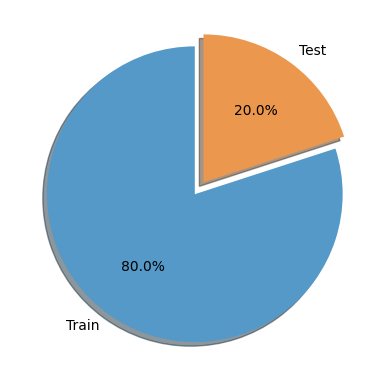

In [4]:
plt.pie([len(X_train),len(X_test)], labels = ["Train", "Test"], startangle = 90, autopct = '%1.1f%%', 
        shadow = True, explode = (0, 0.1), colors = ["#5499C7","#EB984E"])
plt.show() 

The proportion of the ham and smish messages in the entire dataset is presented below:

In [5]:
hams_count

4827

In [6]:
smishes_count

747

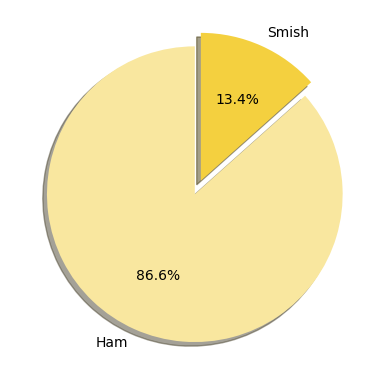

In [7]:
plt.pie([hams_count,smishes_count], labels = ["Ham", "Smish"], startangle = 90, autopct = '%1.1f%%', 
        shadow = True, explode = (0, 0.1), colors = ["#F9E79F", "#F4D03F"])
plt.show() 

### Train set

In [8]:
train_hams = []
train_smishes = []

for i in range(len(y_train)):
    label = y_train[i]
    if label == "ham":
        train_hams.append(X_train[i])
    if label == "smish":
        train_smishes.append(X_train[i])

Example ham messages:

In [9]:
train_hams_count = len(train_hams)
train_hams[:3]

['Armand says get your ass over to epsilon',
 "Lol now I'm after that hot air balloon!",
 'You know, wot people wear. T shirts, jumpers, hat, belt, is all we know. We r at Cribbs']

Example smish messages:

In [10]:
train_smishes_count = len(train_smishes)
train_smishes[:3]

["FREE2DAY sexy St George's Day pic of Jordan!Txt PIC to 89080 dont miss out, then every wk a saucy celeb!4 more pics c PocketBabe.co.uk 0870241182716 Â£3/wk",
 'UR GOING 2 BAHAMAS! CallFREEFONE 08081560665 and speak to a live operator to claim either Bahamas cruise ofÂ£2000 CASH 18+only. To opt out txt X to 07786200117',
 "Refused a loan? Secured or Unsecured? Can't get credit? Call free now 0800 195 6669 or text back 'help' & we will!"]

The proportion of the ham and smish messages in the train subset is presented below:

In [11]:
train_hams_count

3873

In [12]:
train_smishes_count

586

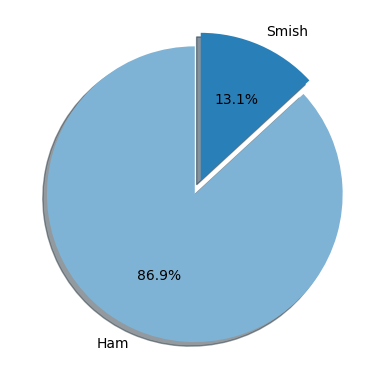

In [13]:
plt.pie([train_hams_count,train_smishes_count], labels = ["Ham", "Smish"], startangle = 90, autopct = '%1.1f%%', 
        shadow = True, explode = (0, 0.1), colors = ["#7FB3D5", "#2980B9"])
plt.show() 

### Test set

In [14]:
test_hams = []
test_smishes = []

for i in range(len(y_test)):
    label = y_test[i]
    if label == "ham":
        test_hams.append(X_test[i])
    if label == "smish":
        test_smishes.append(X_test[i])

Example ham messages:

In [15]:
test_hams_count = len(test_hams)
test_hams[:3]

['You still coming tonight?',
 '"HEY BABE! FAR 2 SPUN-OUT 2 SPK AT DA MO... DEAD 2 DA WRLD. BEEN SLEEPING ON DA SOFA ALL DAY, HAD A COOL NYTHO, TX 4 FONIN HON, CALL 2MWEN IM BK FRMCLOUD 9! J X"',
 'Ya even those cookies have jelly on them']

Example smish messages:

In [16]:
test_smishes_count = len(test_smishes)
test_smishes[:3]

['FREE MESSAGE Activate your 500 FREE Text Messages by replying to this message with the word FREE For terms & conditions, visit www.07781482378.com',
 "T-Mobile customer you may now claim your FREE CAMERA PHONE upgrade & a pay & go sim card for your loyalty. Call on 0845 021 3680.Offer ends 28thFeb.T&C's apply",
 'Kit Strip - you have been billed 150p. Netcollex Ltd. PO Box 1013 IG11 OJA']

The proportion of the ham and smish messages in the test subset is presented below:

In [17]:
test_hams_count

954

In [18]:
test_smishes_count

161

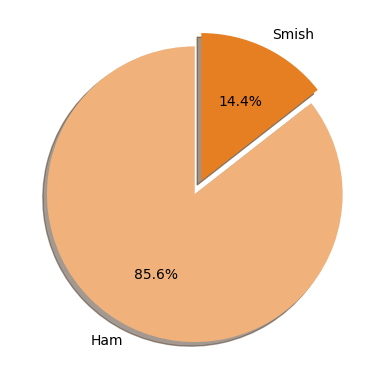

In [19]:
plt.pie([test_hams_count,test_smishes_count], labels = ["Ham", "Smish"], startangle = 90, autopct = '%1.1f%%',
       shadow = True, explode = (0, 0.1), colors = ["#F0B27A","#E67E22"])
plt.show() 

Finally, we save the train and test subsets into pickle files, so we can use the same data in other places.

In [20]:
# save the train and test data to pickle files
train_data = { "X_train" : X_train, "y_train" : y_train }
with open("./data/train_data.pkl", 'wb') as handle:
    pickle.dump(train_data, handle, protocol=pickle.HIGHEST_PROTOCOL)

test_data = { "X_test" : X_test, "y_test" : y_test }
with open("./data/test_data.pkl", 'wb') as handle:
    pickle.dump(test_data, handle, protocol=pickle.HIGHEST_PROTOCOL)